## Fashion Class Classifier

This project uses a database of images of different clothing apparel, which must be classified into different categories: (T-Shirt, Trouser, PullOver, Skirt, etc).

Each image comprises a grid of 28x28 grayscale pixels representing values ranging from 0-255. However, the data per image is given as a row of 784 values (28x28 values) 

The defined test classes for the classifier are:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

**Import data and necessary libraries**

In [6]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

__Import the training and testing data from csv files: *fashion-mnist_train.csv and fashion-mnist_test.csv*__

In [7]:
# Create dataframes for both training and testing datasets 
fashion_train_df = pd.read_csv('input/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('input/fashion-mnist_test.csv', sep = ',')

**Exploratory Data Analyses of the Data**

In [8]:
# What kind of data we have for the dataframes?
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As said before, each image is represented by a row of 785 pixels. Similarly, for the testing data set.

In [9]:
# Create numerical arrays for the training and test dataframes
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

Let's visualize a couple of images

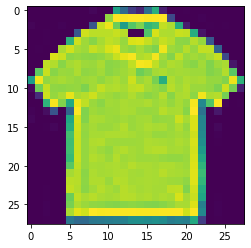

In [10]:
# Re-shaping is required to get the correct image representation. 
# Start the column index at '1' to not include the label
plt.imshow( training[5044,1:].reshape((28,28)) ) # reshape and plot the image

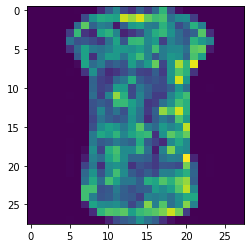

In [11]:
plt.imshow( training[45012,1:].reshape((28,28)) ) # reshape and plot the image

Now, let's visualize a matrix of 12 x 12 images

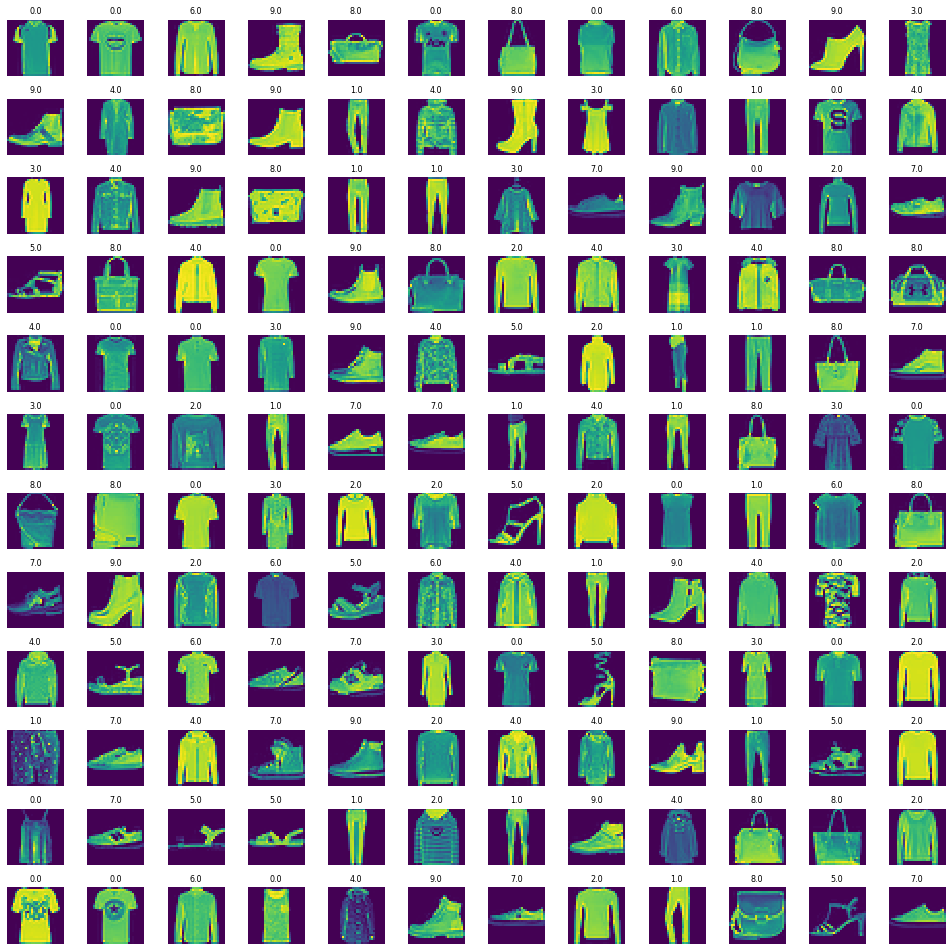

In [12]:
# Define the width and height of the grid
W_grid = 12
H_grid = 12

# fig, axes = plt.subplots(H_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(H_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 12 x 12 matrix into 144 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * H_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

## **Training the Model**

I'll use Convolutional Neural Networks for feature detection

In [13]:
# Prepare training and test data by doing a quick normalization
X_train = training[:,1:]/255 # All columns except first
y_train = training[:,0] # First column has the target info

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [14]:
# Split training data into data for training and validation. Remember that we have a separate set of data for testing
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

Re-shape data into matrices of 28x28 pixels for next processing steps (convolution, pooling, flattening)

In [15]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [16]:
# Check for the shapes of the data
X_train.shape

(48000, 28, 28, 1)

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
X_validate.shape

(12000, 28, 28, 1)

I'll use the open source library for Neural Networks processing _Keras_

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.
C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\t

__Create Convolutional Neural Network Model (CNN model) instance and apply the different layers of image processing to train the model: Convolution, Pooling and Flattening.__

In [2]:
cnn_model = Sequential()

# Convolution step with 32 layers of 3x3 using 'RELU - Rectified Linear Unit'
# The purpose of applying the rectifier function is to increase the non-linearity in our images. 
# The reason we want to do that is that images are naturally non-linear.
cnn_model.add(Conv2D(32,3, 3, input_shape = (28,28,1), activation='relu'))

# Pooling step with output of 2x2
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

# Dropout is a regularization technique, which aims to reduce the complexity of the model 
# with the goal to prevent overfitting.
cnn_model.add(Dropout(0.25))

# Flattening step
cnn_model.add(Flatten())

# In contrast to the dropout layer, a dense layer is simply a layer where each unit or neuron 
# is connected to each neuron in the next layer.
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

W0813 21:06:22.304638 62436 deprecation_wrapper.py:119] From C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """
W0813 21:06:22.590500 62436 deprecation_wrapper.py:119] From C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 21:06:22.598474 62436 deprecation_wrapper.py:119] From C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 21:06:22.658802 62436 deprecation_wrapper.py:119] From C:\Us

In [3]:
# Configure the learning process with compile()
# For a multi-class classification problem like this:

# Optimizer --> Adam: Algorithm for first-order gradient-based optimization of stochastic objective functions.
# Loss -- > 'sparse_categorical_crossentropy' --> Targets must be integer targets
cnn_model.compile(loss ='sparse_categorical_crossentropy', 
                  optimizer=Adam(lr=0.001),
                  metrics =['accuracy'])

W0813 22:16:37.267351 62436 deprecation_wrapper.py:119] From C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 22:16:37.283361 62436 deprecation_wrapper.py:119] From C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



__Fit the model with the training data and validation data__

In [19]:
# Set epochs (number of times the model will train the weights of the features)
epochs = 50
cnn_model.fit(X_train,
              y_train,
              batch_size = 512,
              nb_epoch = epochs,
              verbose = 1,
              validation_data = (X_validate, y_validate))

C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W0813 22:21:42.928033 62436 deprecation.py:323] From C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 23s 470us/step - loss: 0.8984 - acc: 0.6898 - val_loss: 0.5047 - val_acc: 0.8232
Epoch 2/50
48000/48000 [==============================] - 22s 465us/step - loss: 0.4716 - acc: 0.8354 - val_loss: 0.4219 - val_acc: 0.8552
Epoch 3/50
48000/48000 [==============================] - 22s 465us/step - loss: 0.4202 - acc: 0.8522 - val_loss: 0.4049 - val_acc: 0.8587
Epoch 4/50
48000/48000 [==============================] - 25s 528us/step - loss: 0.3941 - acc: 0.8618 - val_loss: 0.3712 - val_acc: 0.8718
Epoch 5/50
48000/48000 [==============================] - 37s 769us/step - loss: 0.3729 - acc: 0.8689 - val_loss: 0.3464 - val_acc: 0.8814
Epoch 6/50
48000/48000 [==============================] - 35s 738us/step - loss: 0.3578 - acc: 0.8739 - val_loss: 0.3396 - val_acc: 0.8828
Epoch 7/50
48000/48000 [==============================] - 20s 420us/step - loss: 0.3474 - acc: 0.8776 - val_loss: 0.

## Evaluating the Model

Let's use the testing data to check how accurate the model is.

In [20]:
# Find the accuracy
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 132us/step
Test Accuracy : 0.918


In [21]:
# get the predictions for the test data
predictions = cnn_model.predict_classes(X_test)

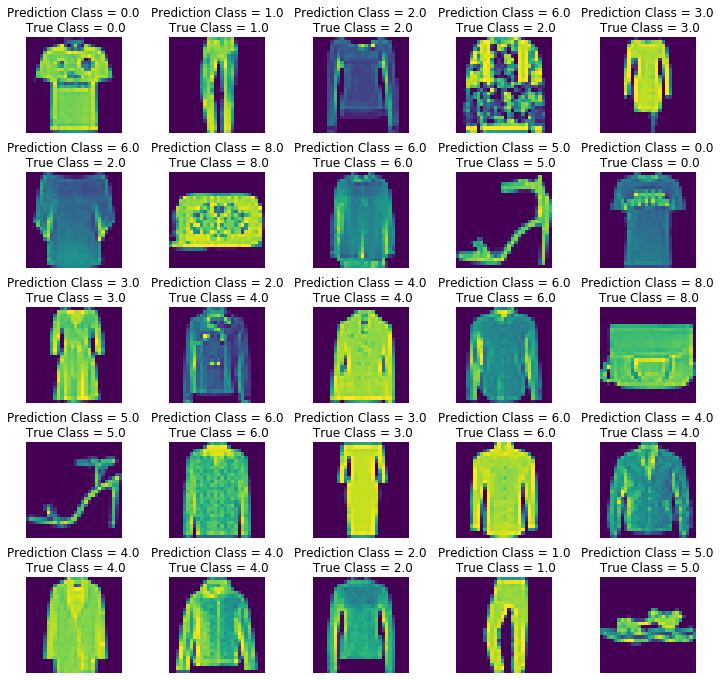

In [23]:
# Display a matrix of 5 x 5 images with their true and predicted classes
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predictions[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

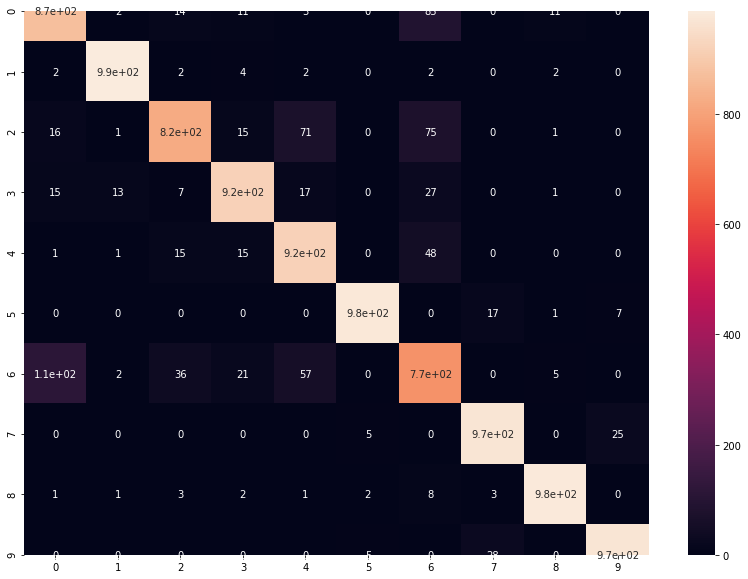

In [25]:
# Find the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [27]:
# Find the classification report

from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predictions, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.86      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.91      0.82      0.87      1000
     Class 3       0.93      0.92      0.93      1000
     Class 4       0.86      0.92      0.89      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.76      0.77      0.76      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# Improving the model

- We can improve the model by increasing the number of filter layers.
- We can add dropout

References:

https://www.quora.com/In-Keras-what-is-a-dense-and-a-dropout-layer - Keras Dense and Dropout layers

https://arxiv.org/abs/1412.6980v8 - Adam Optimizer